<a href="https://colab.research.google.com/github/srivatsan88/YouTubeLI/blob/master/Explaining_Sentiment_Analysis_NLP_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get install default-jre
!java -version

In [0]:
!pip install h2o==3.30.0.1

In [0]:
import h2o
import numpy as np
import pandas as pd

In [0]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpqcwl4g04
  JVM stdout: /tmp/tmpqcwl4g04/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpqcwl4g04/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,1 month and 4 days
H2O_cluster_name:,H2O_from_python_unknownUser_qgsvpf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [0]:
reviews_df=pd.read_csv('reviews.txt',sep='~~',names=['headline','reviews','target'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [0]:
h2o_df=h2o.H2OFrame(reviews_df,column_names=['headline','reviews','target'],column_types=['string','string','numeric'])

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
h2o_df

headline,reviews,target
b'Not what I wanted :(',"b""Well this isn't what I wanted. I did not want a four section pad (as its stiched into compartments for rice)<br /><br />I like to be able to push it all to one side or the other to have more or less heat/pressure<br /><br />The smell of the Lavander is WAYYYYY too much it almost smells like OLD spoiled lavander! Wish I would have read reviews first<br /><br />I could have dealt with the stitching the smell is so bad I have to throw it away WHAT A WASTE OF MONEY!!""",0
b'Great Shaver!',b'Have used this brand most of my shaving life and this model for almost 20yrs. Reliable and reasonable price. Thanks Remington!',1
b'A must buy!',"b""All I have to say is WOW!!! This thing is AMAZING!!! It's much bigger and thicker than I thought it would be. But it feels amazing!!! The &#34;veins&#34; on this thing feel great and the curve hits just the right spots. If ur thinking about getting this do it!! U won't be disappointed. And for the price u can't beat it, no pun intended ;-)""",1
b'Do Not Recommend',"b'I bought this scale from Brookstone. It has a poor readout, one of the numbers flickers and you can not tell what it is. Thus you never know what you weigh! I contacted Brookstone about how to return it and they never got back to me. Not a good buying experience. $20.00 wasted on a piece of junk.'",0
b'towel warmer does not seal',"b'I purchased the One Touch massage Spa Hot Towel Warmer Cabinet,and when i recived it and started to use it,I noticed the door did not seal in the upper right corner.so I notified the company i purchased it from and they informed me that there is no return policy and they had tested it befor they mailed it and it worked fine.so Im stuck with it.because it dosent seal it looses alot of heat.i will try to fix it my self,but would advise anyone not to buy from bella Rosa massage on amazon Marketplace!!!!!!!!!!!!'",0
b'absolute best',b'By far my favorite for tight muscle and stiff neck. Helps with pain in my jaw as well.',1
b'High product failure rate-Buy it with caution',"b'I had bought an earlier model preceding w4100,the 4000 .It broke down two years into use requiring refurbishment and again it failed.When I spoke to productline[Tim] manager,he told me the failure rate is about 3 percent in 4000 and about 2 percent in 4100 and increases to above 3 percent in 3 years. When I told him about poor hardware reliability,he told me iphone does not last more than years,which is not a reply expected from him.He is defending the product high failure rate.The stethescope works well only when it works.For a premium product and for a biomedical product ,the hardware reliabilty and quality control is very poor.Annual life cycle cost of this product is 162.5 Dollars excluding batteries.I recommend people to buy at their own risk'",0
"b""I want to feel like i'm 24 again.""","b""I have been looking for something to give me an edge. I'm trying to lose weight build muscle etc. So I hope this works out.""",1
b'Not Worth It',"b'I am not just downing this product, but all products like this. Please do not buy these things. They only make you big while you are pumping, but the minute you stop...all of the bigness leaves. Seriously they suck.'",0
b'works very well',"b""I'm able to finally get it up thanks to this, used to be a struggle to get an erection and it was hard for me even on a good day. With this its rare that I can't get it up.""",1


In [0]:
h2o_df.shape[0]

400

In [0]:
h2o_df["target"].table()

target,Count
0,105
1,295


In [0]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
def tokenize(line):
  tokenized = line.tokenize("\\W+")
  tokenized = tokenized.tolower()
  tokenized = tokenized[(tokenized.nchar() >= 2) | (tokenized.isna()),:]
  tokenized_filter = tokenized[(tokenized.isna()) | (~ tokenized.isin(stop_words)),:]
  return tokenized_filter

In [0]:
words_reviews = tokenize(h2o_df["reviews"])

In [0]:
words_headline = tokenize(h2o_df["headline"])

In [0]:
words_reviews.head()

C1
well
wanted
want
four
section
pad
stiched
compartments
rice
br


In [0]:
words_headline.head()

C1
wanted
""
great
shaver
""
must
buy
""
recommend
""


In [0]:
words_reviews.shape

(12078, 1)

In [0]:
from h2o.estimators.word2vec import H2OWord2vecEstimator
from h2o.estimators import H2OGradientBoostingEstimator

In [0]:
vec_model=h2o.load_model("w2v_amazon.model")

In [0]:
vec_model.find_synonyms("shaver", count = 5)

OrderedDict([('norelco', 0.8568194508552551),
             ('shavers', 0.8384937047958374),
             ('panasonic', 0.8198525309562683),
             ('remington', 0.8093435168266296),
             ('braun', 0.7870724201202393)])

In [0]:
vec_model.find_synonyms("glasses", count = 5)

OrderedDict([('sunglasses', 0.9062491059303284),
             ('readers', 0.8475663661956787),
             ('bifocals', 0.8233612775802612),
             ('bifocal', 0.8028598427772522),
             ('lenses', 0.7912957072257996)])

In [0]:
review_vecs = vec_model.transform(words_reviews, aggregate_method = "AVERAGE")

In [0]:
headline_vecs = vec_model.transform(words_headline, aggregate_method = "AVERAGE")
headline_vecs.names = ["headline_" + s for s in headline_vecs.names]

In [0]:
review_vecs.shape

(400, 100)

In [0]:
review_vecs.head()

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100
-0.0235897,-0.0943362,0.046669,0.053549,0.0380422,-0.139937,0.021288,-0.0018613,-0.0265983,-0.119492,0.08729,0.00114263,0.0373686,0.202205,0.00305405,-0.0196112,-0.0140258,0.10855,0.0102075,-0.0167493,0.0502948,-0.0363399,0.103093,-0.0207926,0.0712902,-0.0813541,0.0219161,-0.113916,-0.0647198,0.0662271,0.0812541,-0.078073,0.202079,-0.0432785,-0.0472013,-0.13713,0.00165899,-0.0465097,0.0421817,0.0299021,-0.0364854,0.0178728,-0.0931637,0.111829,0.0183157,-0.232664,-0.160935,-0.102866,0.031698,-0.109986,0.0228324,0.0353094,-0.0362298,0.0649579,-0.0673274,0.150522,0.00601622,-0.103511,0.0119496,-0.0264344,-0.117245,-0.0678809,0.0203602,-0.05011,-0.142943,0.147465,0.0303812,-0.039363,-0.137258,0.0301541,-0.00701128,-0.111155,0.0679442,-0.00322878,-0.0928846,0.109909,0.063639,-0.0634107,-0.0474844,-0.0303846,-0.111998,0.0186737,-0.0497739,0.0133188,0.00282824,-0.00119162,-0.065574,0.167358,-0.0356407,0.088806,0.0459011,0.0439339,0.089777,-0.112762,0.0301583,0.114347,-0.0300916,0.0200099,0.075398,-0.0575511
-0.0267184,-0.0746991,0.123901,0.0717693,0.0697752,0.00646052,0.150302,-0.0303922,-0.164465,-0.0387784,0.107687,0.0480452,0.102025,0.0594183,-0.0909733,-0.115757,0.00452405,-0.168552,-0.00297653,-0.0746426,0.0991129,-0.104631,0.0818821,-0.0696691,-0.124786,-0.010951,-0.161381,-0.134014,-0.0769209,-0.0534062,0.0368544,-0.0829076,0.098256,-0.114007,0.01839,-0.145667,0.024858,0.0173954,0.151485,-0.0672344,0.0757432,-0.0689638,-0.0894622,0.05965,-0.00148573,-0.104524,-0.127871,-0.24149,-0.335191,-0.0740244,-0.0192959,0.117943,0.171084,-0.0296111,-0.0630847,0.208567,-0.176606,-0.0302485,0.102223,-0.0132167,0.00518075,-0.0292731,0.032837,0.0925331,-0.043527,0.027017,0.0959667,-0.0885036,-0.0572373,0.0267574,-0.0549759,-0.251392,-0.00339734,-0.107033,-0.0918514,0.0799821,0.203383,0.000393762,-0.169063,0.0293275,-0.079522,-0.0141269,0.015404,0.0106642,-0.148993,0.0331611,-0.164383,0.185302,-0.127495,0.103625,-0.0154834,0.111045,0.108701,-0.0866813,0.0778119,0.160836,-0.131799,-0.0409803,-0.056843,-0.0596652
-0.0768413,0.00284802,0.0312026,0.0605578,-0.043233,-0.168788,0.0493164,0.0826733,-0.00901266,-0.201767,0.194894,0.070415,0.0657498,0.234974,-0.0139757,0.025135,-0.0869464,0.0346383,-0.0196762,-0.0311462,0.15999,-0.054409,0.00983038,0.0695471,-0.0921221,-0.0651336,-0.0232098,-0.106115,-0.1366,0.00889823,0.139722,0.0146413,0.102205,0.0998881,-0.0615694,-0.118317,0.0503215,0.0422135,-0.0250392,0.0173458,-0.129195,0.0661831,-0.086687,0.104407,0.055491,-0.235714,-0.0673975,-0.262413,-0.0131427,-0.135862,0.0158965,0.0440822,-0.00436063,0.00899403,-0.11207,-0.0665095,-0.0245686,-0.00584532,0.0740078,0.0112049,-0.027098,-0.0382971,0.0756364,-0.0313333,-0.0642194,0.0831356,0.107589,-0.143102,-0.0749767,-0.0768106,0.0116806,-0.165305,0.0219486,-0.0579853,-0.0958086,0.187299,0.0510425,-0.0922195,-0.104481,0.0974122,0.0176744,0.0471574,-0.0241736,-0.0495079,-0.002561,-0.0175214,-0.081512,0.265825,0.125608,0.0686583,0.00247917,0.0764167,0.031773,-0.0858762,0.0487125,0.123883,0.0259111,-0.120054,-0.0352084,0.00968651
-0.0508059,-0.179957,0.0465442,-0.0204945,0.0434519,-0.229655,0.0908586,0.000625516,-0.111307,0.0120808,0.213965,-0.0125967,0.132672,0.0849266,-0.0172303,-0.0642169,0.0756674,-0.013245,0.0708525,-0.0408262,-0.0564054,0.0418056,0.149826,-0.0921761,0.00479216,-0.0748667,0.0406384,-0.211613,-0.0141081,0.104555,-0.0291484,-0.0345137,0.111775,-0.125176,-0.0756227,-0.203498,-0.0705912,0.123305,0.0564757,-0.0483029,0.0108887,-0.0209822,-0.113419,0.00851502,0.0738609,-0.171261,-0.153512,-0.291633,-0.172267,-0.125886,0.155281,0.0643922,-0.133959,0.113043,-0.06

In [0]:
headline_vecs.head()

headline_C1,headline_C2,headline_C3,headline_C4,headline_C5,headline_C6,headline_C7,headline_C8,headline_C9,headline_C10,headline_C11,headline_C12,headline_C13,headline_C14,headline_C15,headline_C16,headline_C17,headline_C18,headline_C19,headline_C20,headline_C21,headline_C22,headline_C23,headline_C24,headline_C25,headline_C26,headline_C27,headline_C28,headline_C29,headline_C30,headline_C31,headline_C32,headline_C33,headline_C34,headline_C35,headline_C36,headline_C37,headline_C38,headline_C39,headline_C40,headline_C41,headline_C42,headline_C43,headline_C44,headline_C45,headline_C46,headline_C47,headline_C48,headline_C49,headline_C50,headline_C51,headline_C52,headline_C53,headline_C54,headline_C55,headline_C56,headline_C57,headline_C58,headline_C59,headline_C60,headline_C61,headline_C62,headline_C63,headline_C64,headline_C65,headline_C66,headline_C67,headline_C68,headline_C69,headline_C70,headline_C71,headline_C72,headline_C73,headline_C74,headline_C75,headline_C76,headline_C77,headline_C78,headline_C79,headline_C80,headline_C81,headline_C82,headline_C83,headline_C84,headline_C85,headline_C86,headline_C87,headline_C88,headline_C89,headline_C90,headline_C91,headline_C92,headline_C93,headline_C94,headline_C95,headline_C96,headline_C97,headline_C98,headline_C99,headline_C100
0.0726135,0.056742,0.282203,0.0819901,-0.111938,-0.180313,0.22109,-0.107876,-0.068493,-0.204538,0.215011,0.00804753,0.0978605,0.04644,-0.196952,0.0841733,0.106753,0.157678,0.160982,0.0258853,-0.0262195,0.119951,0.0616987,-0.0881329,-0.0475629,-0.220645,0.109434,-0.187359,-0.133566,-0.0468173,-0.434771,-0.199745,0.0825976,-0.122619,-0.120492,-0.36106,0.145381,-0.138524,0.0326654,-0.194585,-0.0845406,0.154027,-0.118049,0.322915,-0.314898,-0.156482,-0.202879,-0.223518,-0.0209619,-0.351745,-0.0591792,-0.110311,0.18009,-0.0769079,0.0337221,0.239004,0.0514296,0.184325,0.163954,0.0971651,-0.190798,0.0529597,0.0219213,-0.0317424,-0.047158,0.208096,0.111037,0.138568,0.104363,-0.0436805,0.0888569,-0.0963954,0.0636771,-0.064947,-0.224414,0.203691,0.152897,0.0749412,-0.148309,-0.00872165,0.0916642,0.0440057,0.0100677,-0.022729,-0.0461798,0.0204408,-0.168099,-0.045887,0.106997,0.00278854,0.150904,-0.00649837,0.169957,0.051302,0.109997,0.0890683,0.0250953,-0.0218414,-0.113402,0.175541
0.0985717,0.0194392,0.18109,0.173646,0.0331039,0.0877985,0.0554573,-0.070928,-0.0748239,-0.241862,0.141667,0.144358,0.170589,0.186124,-0.18822,-0.128433,-0.153397,-0.161563,0.0677961,0.0946356,0.0876714,-0.179229,0.119269,-0.0532511,-0.233716,0.149478,-0.0920871,-0.231393,-0.0934427,0.127727,0.215613,0.0383523,-0.0225205,-0.0896057,-0.000653461,-0.0712041,0.214335,0.0788042,0.0236887,-0.0370189,0.141233,-0.186139,-0.167688,-0.0891657,0.0536717,0.0486113,-0.194752,-0.122356,-0.277635,0.0259294,-0.0437909,-0.0673151,0.170054,0.0579058,0.0692458,0.176816,-0.147954,-0.0855075,0.0863328,0.076117,0.154213,-0.177812,0.113501,0.282847,-0.0213371,-0.0433421,0.0894588,-0.134439,-0.0800255,-0.0128096,-0.0863859,-0.312848,-0.0339835,-0.286208,-0.17276,-0.0217406,0.324704,0.0031025,-0.165292,-0.160458,-0.0758443,0.274847,-0.0109385,0.0556924,-0.1577,0.0873062,-0.0861794,0.43034,-0.139996,0.197337,-0.0108087,0.0695055,0.136743,-0.130014,0.16545,0.254047,-0.0142715,0.040495,0.209377,-0.0214036
-0.0732273,-0.168929,0.0784872,0.123316,0.00825487,-0.0622432,0.0411583,-0.0170163,0.0198493,0.0547626,0.258449,0.0321688,0.192467,0.2926,0.0533199,0.05431,-0.0522813,0.117766,0.0441459,-0.109188,-0.0433731,-0.0584169,0.285935,0.0644105,-0.10516,-0.185374,-0.0240614,-0.144476,-0.0851688,-0.0269362,0.0557834,-0.134122,0.0892278,-0.201837,-0.00468347,-0.116059,0.0688749,-0.0182053,-0.0627969,-0.145292,0.138103,-0.0417901,-0.176478,0.212516,0.0296519,-0.260593,-0.0863586,-0.289359,-0.0503976,-0.145964,-0.0780565,-0.011473,0.03401,0.167505,-0.0810149,0.137137,-0.087645,0.0299988,0.206914,0.0784216,0.0728091,0.0552621,-0.0676242,0.0277975,-0.100728,0.142782,-0.143918,-0.0883297,-0.160391,-0.0606443,0.00339844,-0.11654,0.083

In [0]:
h2o_df_ext=h2o_df.cbind(review_vecs)
h2o_df_ext=h2o_df_ext.cbind(headline_vecs)

In [0]:
h2o_df_ext.head()

headline,reviews,target,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100,headline_C1,headline_C2,headline_C3,headline_C4,headline_C5,headline_C6,headline_C7,headline_C8,headline_C9,headline_C10,headline_C11,headline_C12,headline_C13,headline_C14,headline_C15,headline_C16,headline_C17,headline_C18,headline_C19,headline_C20,headline_C21,headline_C22,headline_C23,headline_C24,headline_C25,headline_C26,headline_C27,headline_C28,headline_C29,headline_C30,headline_C31,headline_C32,headline_C33,headline_C34,headline_C35,headline_C36,headline_C37,headline_C38,headline_C39,headline_C40,headline_C41,headline_C42,headline_C43,headline_C44,headline_C45,headline_C46,headline_C47,headline_C48,headline_C49,headline_C50,headline_C51,headline_C52,headline_C53,headline_C54,headline_C55,headline_C56,headline_C57,headline_C58,headline_C59,headline_C60,headline_C61,headline_C62,headline_C63,headline_C64,headline_C65,headline_C66,headline_C67,headline_C68,headline_C69,headline_C70,headline_C71,headline_C72,headline_C73,headline_C74,headline_C75,headline_C76,headline_C77,headline_C78,headline_C79,headline_C80,headline_C81,headline_C82,headline_C83,headline_C84,headline_C85,headline_C86,headline_C87,headline_C88,headline_C89,headline_C90,headline_C91,headline_C92,headline_C93,headline_C94,headline_C95,headline_C96,headline_C97
b'Not what I wanted :(',"b""Well this isn't what I wanted. I did not want a four section pad (as its stiched into compartments for rice)<br /><br />I like to be able to push it all to one side or the other to have more or less heat/pressure<br /><br />The smell of the Lavander is WAYYYYY too much it almost smells like OLD spoiled lavander! Wish I would have read reviews first<br /><br />I could have dealt with the stitching the smell is so bad I have to throw it away WHAT A WASTE OF MONEY!!""",0,-0.0235897,-0.0943362,0.046669,0.053549,0.0380422,-0.139937,0.021288,-0.0018613,-0.0265983,-0.119492,0.08729,0.00114263,0.0373686,0.202205,0.00305405,-0.0196112,-0.0140258,0.10855,0.0102075,-0.0167493,0.0502948,-0.0363399,0.103093,-0.0207926,0.0712902,-0.0813541,0.0219161,-0.113916,-0.0647198,0.0662271,0.0812541,-0.078073,0.202079,-0.0432785,-0.0472013,-0.13713,0.00165899,-0.0465097,0.0421817,0.0299021,-0.0364854,0.0178728,-0.0931637,0.111829,0.0183157,-0.232664,-0.160935,-0.102866,0.031698,-0.109986,0.0228324,0.0353094,-0.0362298,0.0649579,-0.0673274,0.150522,0.00601622,-0.103511,0.0119496,-0.0264344,-0.117245,-0.0678809,0.0203602,-0.05011,-0.142943,0.147465,0.0303812,-0.039363,-0.137258,0.0301541,-0.00701128,-0.111155,0.0679442,-0.00322878,-0.0928846,0.109909,0.063639,-0.0634107,-0.0474844,-0.0303846,-0.111998,0.0186737,-0.0497739,0.0133188,0.00282824,-0.00119162,-0.065574,0.167358,-0.0356407,0.088806,0.0459011,0.0439339,0.089777,-0.112762,0.0301583,0.114347,-0.0300916,0.0200099,0.075398,-0.0575511,0.0726135,0.056742,0.282203,0.0819901,-0.111938,-0.180313,0.22109,-0.107876,-0.068493,-0.204538,0.215011,0.00804753,0.0978605,0.04644,-0.196952,0.0841733,0.106753,0.157678,0.160982,0.0258853,-0.0262195,0.119951,0.0616987,-0.0881329,-0.0475629,-0.220645,0.109434,-0.187359,-0.133566,-0.0468173,-0.434771,-0.199745,0.0825976,-0.122619,-0.120492,-0.36106,0.145381,-0.138524,0.0326654,-0.194585,-0.0845406,0.154027,-0.118049,0.322915,-0.314898,-0.156482,-0.202879,-0.223518,-0.0209619,-0.351745,-0.0591792,-0.110311,0.18009,-0.0769079,0.0337221,0.239004,0.0514296,0.184325,0.163954,0.0971651,-0.190798,0.0529597,0.0219213,-0.0317424,-0.047158,0.208096,0.111037,0.138568,0.104363,-0.0436805,0.0888569,-0.0963954,0.0636771,-0.064947,-0.224414,0.203691,0.152897,0.0749412,-0.148309,-0.00872165,0.0916642,0.0440057,0.010067

In [0]:
gbm_final=h2o.load_model('GBM_model_python_1588628225929_1')

In [0]:
gbm_final.model_performance(h2o_df_ext[headline_vecs.names+review_vecs.names+['target']])


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.05229671331851229
RMSE: 0.22868474658033555
LogLoss: 0.1847204534599848
Mean Per-Class Error: 0.07506053268765134
AUC: 0.974043583535109
AUCPR: 0.9893413214277573
Gini: 0.948087167070218

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5507084448871522: 


,,0,1,Error,Rate
0,0,93.0,12.0,0.1143,(12.0/105.0)
1,1,12.0,283.0,0.0407,(12.0/295.0)
2,Total,105.0,295.0,0.06,(24.0/400.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.550708,0.959322,294.0
1,max f2,0.207616,0.972955,335.0
2,max f0point5,0.670836,0.961672,284.0
3,max accuracy,0.550708,0.940000,294.0
4,max precision,0.998896,1.000000,0.0
5,max recall,0.207616,1.000000,335.0
6,max specificity,0.998896,1.000000,0.0
7,max absolute_mcc,0.550708,0.845036,294.0
8,max min_per_class_accuracy,0.705619,0.914286,278.0
9,max mean_per_class_accuracy,0.670836,0.924939,284.0



Gains/Lift Table: Avg response rate: 73.75 %, avg score: 72.86 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.998388,1.355932,1.355932,1.000,0.998775,1.000000,0.998775,0.013559,0.013559,35.593220,35.593220
1,,2,0.02,0.997845,1.355932,1.355932,1.000,0.998123,1.000000,0.998449,0.013559,0.027119,35.593220,35.593220
2,,3,0.03,0.997618,1.355932,1.355932,1.000,0.997762,1.000000,0.998220,0.013559,0.040678,35.593220,35.593220
3,,4,0.04,0.997269,1.355932,1.355932,1.000,0.997417,1.000000,0.998019,0.013559,0.054237,35.593220,35.593220
4,,5,0.05,0.997158,1.355932,1.355932,1.000,0.997219,1.000000,0.997859,0.013559,0.067797,35.593220,35.593220
5,,6,0.10,0.995714,1.355932,1.355932,1.000,0.996571,1.000000,0.997215,0.067797,0.135593,35.593220,35.593220
6,,7,0.15,0.992979,1.355932,1.355932,1.000,0.994604,1.000000,0.996345,0.067797,0.203390,35.593220,35.593220
7,,8,0.20,0.989874,1.355932,1.355932,1.000,0.991689,1.000000,0.995181,0.067797,0.271186,35.593220,35.593220
8,,9,0.30,0.976273,1.322034,1.344633,0.975,0.983758,0.991667,0.991373,0.132203,0.403390,32.203390,34.463277
9,,10,0.40,0.958773,1.355932,1.347458,1.000,0.968291,0.993750,0.985603,0.135593,0.538983,35.593220,34.745763


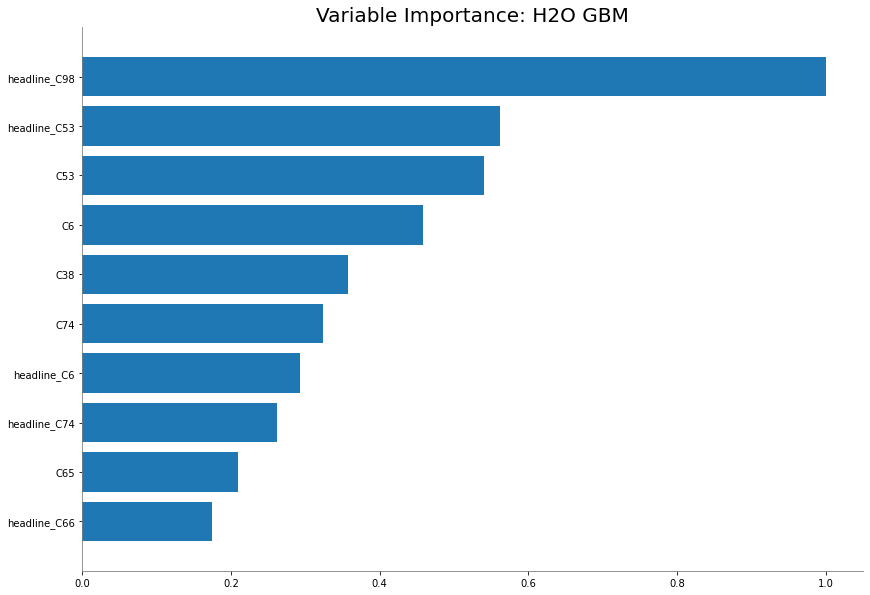

In [0]:
gbm_final.varimp_plot()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%

PartialDependence: Partial Dependence Plot of model GBM_model_python_1588628225929_1 on column 'headline_C98'


,headline_c98,mean_response,stddev_response,std_error_mean_response
0,-0.833813,0.750872,0.328294,0.016415
1,-0.766609,0.750872,0.328294,0.016415
2,-0.699406,0.750872,0.328294,0.016415
3,-0.632202,0.750872,0.328294,0.016415
4,-0.564999,0.750872,0.328294,0.016415
5,-0.497795,0.750872,0.328294,0.016415
6,-0.430592,0.750872,0.328294,0.016415
7,-0.363389,0.751097,0.328674,0.016434
8,-0.296185,0.751097,0.328674,0.016434
9,-0.228982,0.751098,0.328588,0.016429


[]

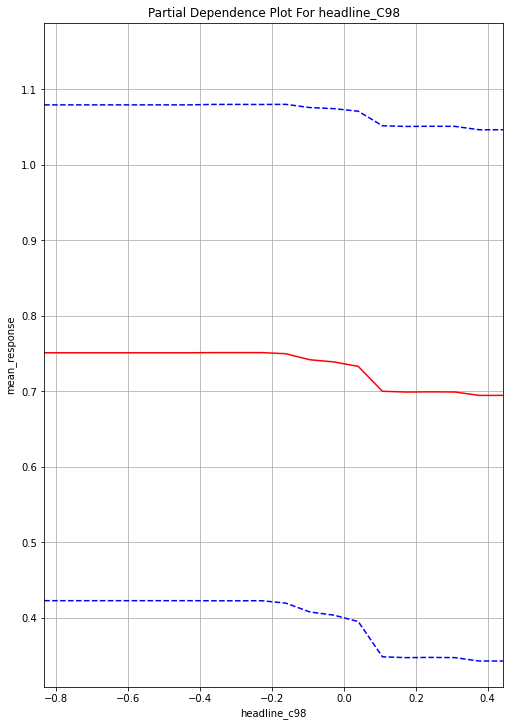

In [0]:
gbm_final.partial_plot(data = h2o_df_ext, cols = ["headline_C98"])

In [0]:
unique_words = words_headline.asfactor().unique().ascharacter()

In [0]:
unique_words.col_names = ["Word"]
word_embeddings = vec_model.transform(unique_words, aggregate_method="NONE")
word_embeddings = unique_words.cbind(word_embeddings)
word_embeddings = word_embeddings[~(word_embeddings["C1"].isna())]

In [0]:
word_embeddings

Word,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100
10,0.199773,-0.16939,0.376599,-0.360822,0.196466,-0.263614,0.241081,-0.204358,-0.311734,0.0611571,0.262496,0.13959,-0.144652,0.00957113,0.139296,-0.391759,0.0784919,-0.119117,-0.106906,-0.239084,-0.160914,0.0336082,0.173595,0.211522,0.0538342,-0.219073,0.179426,0.215728,-0.257573,0.142056,0.0242326,0.121006,0.0503526,-0.0742129,-0.0083994,-0.0527383,-0.345637,-0.318552,0.159418,0.00295908,0.122509,0.168058,-0.137041,0.019846,0.257065,-0.283685,-0.185816,-0.329677,-0.167769,-0.184999,0.0417556,-0.0198872,-0.135088,-0.074212,0.226742,0.00601057,-0.149066,-0.286348,0.0369019,-0.152739,-0.0451942,-0.10083,0.223987,-0.0992648,-0.242245,-0.0782048,0.090927,-0.289629,0.268641,-0.157775,-0.0287454,-0.158575,0.0653237,0.0765034,-0.469495,0.202876,0.0421104,0.199155,-0.226179,0.0284228,-0.596143,-0.183498,-0.0114327,-0.122014,-0.0646081,0.418229,0.295982,0.183438,0.0332404,-0.00639095,-0.0478193,0.206869,0.159,-0.186928,0.16598,-0.128483,-0.220541,-0.0248918,0.178152,-0.145419
12,0.267083,-0.245688,0.302302,-0.0181869,0.0764535,0.0155064,0.194669,-0.0764542,-0.21203,-0.0541727,0.232105,0.0609139,0.0544825,-0.114615,-0.0290393,-0.0134372,0.0492783,-0.264073,0.0629394,-0.1569,-0.313128,-0.0271289,0.118418,0.131672,0.21221,0.0119158,-0.132625,0.075865,-0.491099,0.25285,0.0676437,-0.232315,-0.101526,-0.0849736,-0.167304,-0.105724,-0.507004,-0.316684,0.29957,-0.0799104,0.192142,0.168787,0.0535136,-0.0432239,0.393358,-0.157539,-0.21854,-0.442137,-0.0545592,-0.379819,-0.0885464,-0.263605,0.0529386,-0.00583933,0.127335,-0.0942542,0.201667,-0.239694,-0.00551068,-0.242538,-0.0427935,-0.381949,0.552154,-0.110754,-0.460794,0.0380117,0.107192,-0.041619,0.202322,-0.218699,-0.130231,0.0182394,-0.172894,-0.0938436,-0.230095,0.0292674,0.17741,0.17745,-0.0950754,0.139002,-0.427763,-0.222518,0.198511,-0.114188,-0.0799137,0.205717,0.28415,-0.0670746,-0.363932,0.00935144,0.222023,0.325269,-0.0562397,-0.113611,0.203704,-0.0542336,-0.0773834,-0.0981021,0.26824,-0.217215
24,0.147525,-0.672621,0.322205,-0.176679,0.207103,0.131892,0.0743528,0.141751,-0.295387,-0.423763,0.162178,0.295476,0.0702891,-0.360262,-0.0847913,0.0278446,0.0607127,-0.0824511,0.0197352,-0.408419,-0.284968,0.179423,0.0870789,0.153293,0.0587984,0.105018,-0.274672,0.0711659,-0.550873,0.486693,0.150605,-0.268988,0.197527,0.159584,-0.267503,0.0710506,-0.33041,-0.411314,0.386258,0.0091673,0.351293,-0.0698834,0.195725,-0.0345578,0.368962,-0.493933,0.37744,-0.296211,-0.0498806,-0.325452,0.222219,-0.476912,-0.0731025,-0.0263375,-0.0625411,-0.193495,0.168333,-0.45434,0.120234,-0.109177,0.0484769,-0.286834,0.467127,-0.181053,-0.185639,-0.338195,-0.316831,-0.133778,0.0758232,0.0459209,0.170173,0.0977676,-0.0955015,0.013061,-0.272649,0.346495,0.328649,-0.124567,0.058152,-0.0825174,-0.219863,-0.173108,0.355427,-0.166394,-0.287709,0.227129,0.0587061,0.0732987,-0.255038,0.010996,0.394454,0.318626,-0.223094,0.141483,0.407022,-0.463898,-0.139017,-0.0616978,-0.0451878,-0.0591835
2nd,-0.0506222,-0.134821,0.58113,-0.0965655,0.313648,-0.311234,-0.324864,-0.0969331,0.0731583,-0.0116287,0.105456,0.112077,0.406399,0.144717,0.0982833,-0.313485,0.350948,0.210535,0.0968623,-0.0952014,-0.257161,0.279056,0.145866,-0.189442,0.398316,0.131903,0.139701,-0.162556,-0.137838,0.236844,-0.250151,-0.0908479,-0.00739848,0.0119959,0.0592785,0.0928751,0.0110699,-0.0973976,0.268511,-0.142364,-0.228831,0.0672776,-0.224709,0.369001,0.27736,-0.0719345,-0.192535,-0.172817,0.0262648,0.211042,-0.0782831,-0.212154,-0.0194476,0.183186,-0.423884,0.0488504,-0.259117,0.0470666,-0.0723401,0.122716,-0.0709915,-0.0987464,0.306295,0.210522,0.00716018,0.14380

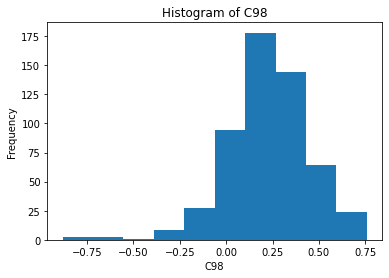

In [0]:
word_embeddings["C98"].hist()

In [0]:
low_c98_words = word_embeddings[word_embeddings["C98"] < -.2]
low_c98_words[["Word", "C98"]].head(15)

Word,C98
7000,-0.214841
absolute,-0.249361
accurate,-0.27566
amazing,-0.220155
arm,-0.284592
arthritis,-0.486511
awesome,-0.267042
balm,-0.276012
bayer,-0.320179
bigger,-0.456172


In [0]:
high_c98_words = word_embeddings[word_embeddings["C98"] > 0.2]
high_c98_words[["Word", "C98"]].head(15)

Word,C98
35,0.300283
adjustable,0.348073
aftershave,0.258376
aware,0.308144
basket,0.301728
beards,0.395413
beware,0.383535
broke,0.234378
buying,0.216686
cheaply,0.483946


PartialDependencePlot progress: |█████████████████████████████████████████| 100%

PartialDependence: Partial Dependence Plot of model GBM_model_python_1588628225929_1 on column 'headline_C53'


,headline_c53,mean_response,stddev_response,std_error_mean_response
0,-0.625123,0.697395,0.349370,0.017468
1,-0.554137,0.697395,0.349370,0.017468
2,-0.483151,0.697395,0.349370,0.017468
3,-0.412165,0.697395,0.349370,0.017468
4,-0.341178,0.697900,0.349225,0.017461
5,-0.270192,0.697900,0.349225,0.017461
6,-0.199206,0.699135,0.349172,0.017459
7,-0.128220,0.701214,0.349198,0.017460
8,-0.057233,0.706291,0.348019,0.017401
9,0.013753,0.718367,0.347236,0.017362


[]

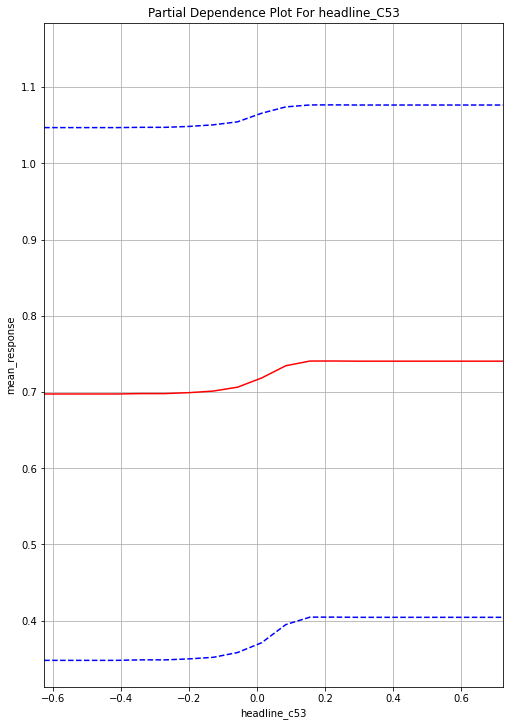

In [0]:
gbm_final.partial_plot(data = h2o_df_ext, cols = ["headline_C53"])

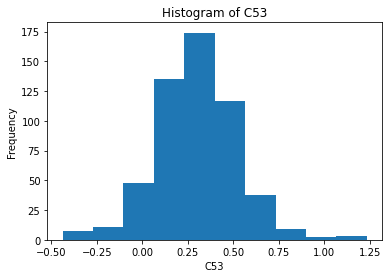

In [0]:
word_embeddings["C53"].hist()

In [0]:
low_c53_words = word_embeddings[word_embeddings["C53"] < -.2]
low_c53_words[["Word", "C53"]].head(15)

Word,C53
absolute,-0.331737
alarm,-0.360701
arrival,-0.431152
baking,-0.212621
bang,-0.249266
cacao,-0.38883
callus,-0.254295
cheaply,-0.34693
come,-0.203229
components,-0.212798


In [0]:
high_c53_words = word_embeddings[word_embeddings["C53"] > 0.3]
high_c53_words[["Word", "C53"]].head(15)

Word,C53
aloe,0.530727
arthritis,0.485595
balm,0.656114
bandages,0.319607
best,0.345299
converted,0.343158
cordless,0.442391
crutch,0.301784
decent,0.407255
deluxe,0.327715
